## Implementing a Neural Network that Predicts Life Expectancy

In this notebook, I will be referencing to the Life Expectancy Dataset from [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) which aside from demographic variables, includes other features such as:
- immunisation factors
- mortality factors
- economic factors
- socail factors
- other health-related factors

I will be designing, training, and evaluating a neural network model performing the task fo regression to predict life expectancies.

### Data Preprocessing

In [1]:
import pandas as pd

# load dataset
dataset = pd.read_csv('./data/life_expectancy.csv')
# print first 5 rows
dataset.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [2]:
# get a summary of the dataset
dataset.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837,69.234717
std,4.613841,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139,9.509115
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,2004.000000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,63.200000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,2012.000000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000,75.600000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


Since I just want to learn a general pattern across all countries, and not only those dependent on specific countries, I will drop the `Country` column.

In [3]:
# drop the country column from the dataset
dataset = dataset.drop('Country', axis=1)
dataset.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [4]:
# create a labels column in the dataset that contains the life expectancy
labels = dataset.iloc[:, -1]

# create features as well which is the rest of the dataset excluding last column - life expectancy
features = dataset.iloc[:, :-1]

In [5]:
# convert categorical columns into numerical columns using one-hot encoding
features = pd.get_dummies(features)
features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True


I will split the features and labels by using a 80/20 split - 80% will be used for training and 20% for testing.

In [6]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Next, I will standardise/normalise the numerical features, which can be done using `sklearn.compose.ColumnTransformer`.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# identify the numerical features first
numerical_features = features.select_dtypes(include=['float64', 'int64'])
# identify the column names
numerical_columns = numerical_features.columns

# initalise ColumnTransformer
ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('only numeric', StandardScaler(),
                                 Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object'))])

In [8]:
# fit ColumnTransformer to trainin data and transform it 
features_train_scaled = ct.fit_transform(features_train)

# trasnform testing data
features_test_scaled = ct.transform(features_test)

### Model Building

I will utilise `tensorflow`'s `Sequential` model for this use case.

`Sequential` is a convenient way to build neural network models and allows one ot create a linear stack of layers, where each layer is connected to the next one in a sequence; this makes it easy to define and train models with a straightforward flow of data.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer

model = Sequential()
# create input layer to network model with the shape corresponding to number of features
input = InputLayer(shape=(features.shape[1],))
# add input layer to model
model.add(input)

model

<Sequential name=sequential, built=False>

In [10]:
from tensorflow.keras.layers import Dense

# add dense hidden layer to the model
model.add(Dense(64, activation='relu'))
# add dense output layer to the model with one neuron since we need single output for regression prediction
model.add(Dense(1))

# get the model's summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

### Initialising the Optimiser and Compiling the Model

In [11]:
from tensorflow.keras.optimizers import Adam

# create instance of Adam optimiser with learning rate of 0.01
adam = Adam(learning_rate=0.01)

# compile the model
model.compile(optimizer=adam, loss='mse', metrics=['mae'])

### Fitting and Model Evaluation

In [12]:
# train the model
model_history = model.fit(features_train_scaled, labels_train, epochs=40, batch_size=1, verbose=1)

# evaluate the model
model_mse, model_mae = model.evaluate(features_test_scaled, labels_test, verbose=0)

print("Mean Squared Error: ", model_mse)
print("Mean Absolute Error: ", model_mae)

Epoch 1/40


2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step - loss: 553.1740 - mae: 13.3519
Epoch 2/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - loss: 32.7168 - mae: 3.9802
Epoch 3/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - loss: 22.1637 - mae: 3.5767
Epoch 4/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - loss: 19.1816 - mae: 3.2993
Epoch 5/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - loss: 23.5352 - mae: 3.4365
Epoch 6/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - loss: 15.1215 - mae: 2.9465
Epoch 7/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - loss: 17.5880 - mae: 3.0098
Epoch 8/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - loss: 12.0926 - mae: 2.6354
Epoch 9/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - loss: 15.4201 - mae: 2.9456
Epoch 10/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - loss: 14.3657 - mae: 2.8256
Epoch 11/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - loss: 14.5799 - mae: 2.7716
Epoch 12/40
2350/2350 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - lo

Here are some insights that we can derive from the performance of the neural network model:

1. **Rapid Decrease in Loss**
The loss drops significantly from the first to the second epoch, indicating that the model quickly learns from the initial weights and biases adjustments. This rapid decrease suggests that the initial learning rate is effective for the early stages of training.

2. **Fluctuations in both loss and MAE**
There are fluctuations in both loss and MAE values across epochs, which might indicate that the model is somewhat sensitive to the nuances of the data.

    Nevertheless, towards the later epochs, both loss and MAE start to stabilise, suggesting that the model begins to converge. Further tuning of the hyperparameters or increase in model complexity could potentially yield better results to address the fluctuations. 

3. **Overall Model Evaluation**
The final MSE and MAE values on the test set are relatively low, which suggests th- at the model has a decent performance in predicting life expectancy based on the given features. 

### Visualisations

#### Loss and MAE Over Epochs

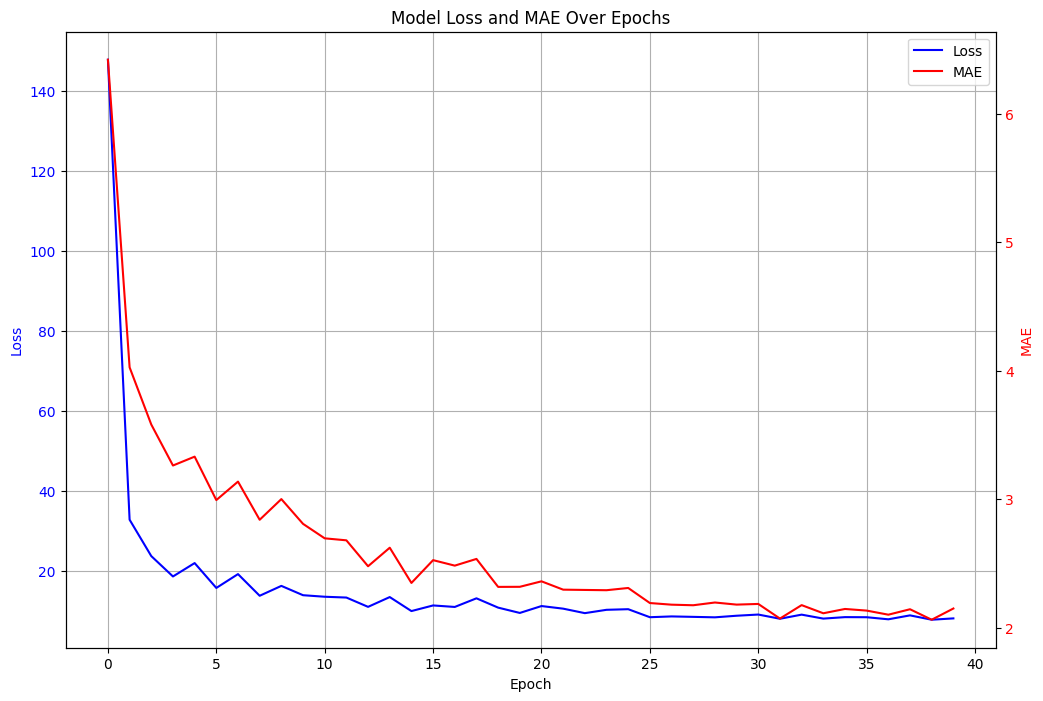

In [16]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(12, 8))

# Creating the first axis for the loss
ax1 = plt.gca() # gets the current axis
line1 = ax1.plot(model_history.history['loss'], color='blue', label='Loss')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Specifying the title and the x-axis label
plt.title('Model Loss and MAE Over Epochs')
plt.xlabel('Epoch')

# Creating a second y-axis for the MAE, sharing the same x-axis
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
line2 = ax2.plot(model_history.history['mae'], color='red', label='MAE')
ax2.set_ylabel('MAE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combining the legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=0)

# Optional: Adding a grid for better readability (mainly for the primary y-axis)
ax1.grid(True)

# Showing the plot
plt.show()

The sharp drop in loss and MAE values is observed from the graph above within the first 3 epochs as well as the fluctuations across both indicators after the 3rd epoch. 

Health organisations and governments can use this model confidently, up to a certain level of error tolerance as indicated by the MAE, for making informed decisions or as a basis for further model refinement.

#### Actual vs Predicted Values

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


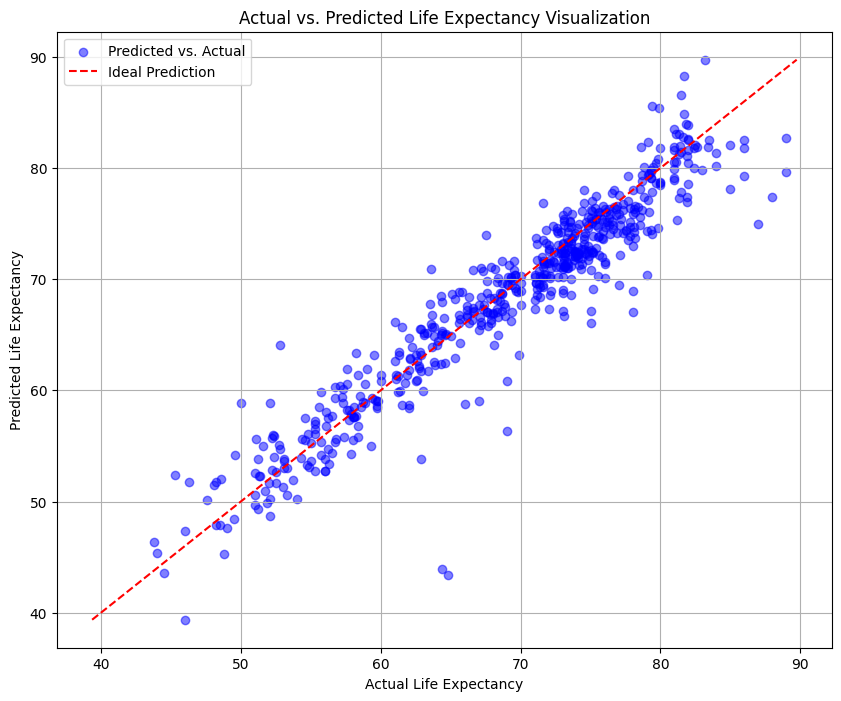

In [18]:
# Use the features_test_scaled for prediction as it's already preprocessed
predicted_values = model.predict(features_test_scaled).flatten()

# The labels_test contains your actual life expectancy values
actual_values = labels_test.to_numpy()

# Setting up the plot
plt.figure(figsize=(10, 8))

# Plotting actual vs. predicted values
plt.scatter(actual_values, predicted_values, alpha=0.5, color='blue', label='Predicted vs. Actual')

# Plotting the ideal 1:1 line for perfect predictions
max_val = max(actual_values.max(), predicted_values.max())
min_val = min(actual_values.min(), predicted_values.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

# Adding title and labels 
plt.title('Actual vs. Predicted Life Expectancy Visualization')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Adding a legend to enhance understanding
plt.legend()

# Adding a grid for better readability
plt.grid(True)

# Showing the plot
plt.show()

From the graph above, apart from the outliers and deviations, the predicted vs actual scatter plot generally follows a linear pattern akin to the ideal prediction plot. The distribution of points suggests a strong positive correlation between the predicted and actual values, which is good for predictive accuracy.

For businesses that depend on life expectancy predictions, such as insurance companies, this model provides a strong basis for assessing risk and setting premiums, with the caveat that additional care might be needed for outlier cases.